In [45]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from xgcm import Grid

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [46]:
%cd /glade/u/home/eyankovsky/MOM6-examples/ocean_only/my_single_column/KPP_likeGCM
#fs = xr.open_dataset('KPP/static.nc', decode_times=False)
os = xr.open_dataset('ocean.stats.nc', decode_times=False)
ds = xr.open_dataset('prog.nc', decode_times=False)  
MARBL = xr.open_dataset('marbl.nc', decode_times=False)
prog = xr.open_dataset('prog_z.nc', decode_times=False)
visc = xr.open_dataset('visc.nc', decode_times=False)


forcing = xr.open_dataset('surffluxes.nc', decode_times=False)

/glade/u/home/eyankovsky/MOM6-examples/ocean_only/my_single_column/KPP_likeGCM


In [47]:
dz = np.array(ds.zi.diff('zi'))
dz.shape


(75,)

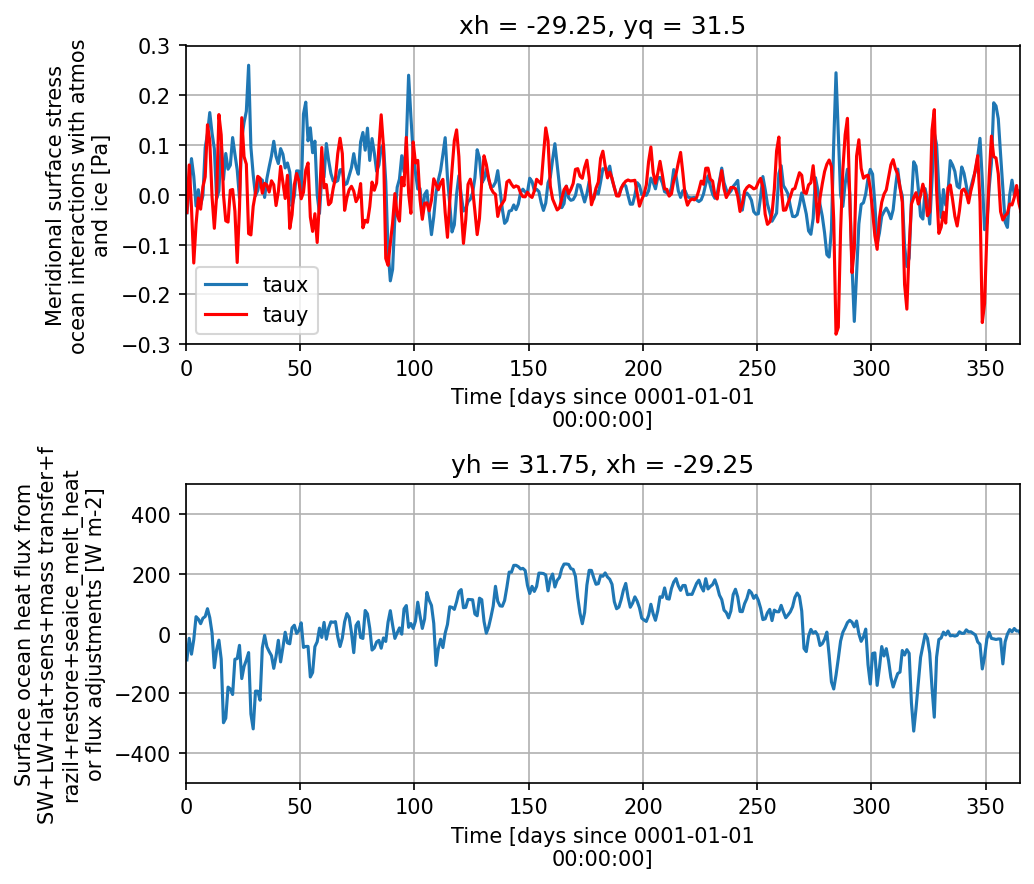

In [48]:
fig = plt.figure(figsize=(7, 6),dpi=150)

timelim=365
plt.subplot(2,1,1)
forcing.taux[:,1,1].plot(label='taux')
forcing.tauy[:,1,1].plot(color='r',label='tauy')
plt.legend(); plt.grid('on'); plt.xlim([0,timelim]); plt.ylim([-0.3,0.3])

plt.subplot(2,1,2)
forcing.net_heat_surface[:,1,1].plot()
plt.grid('on'); 
plt.xlim([0,timelim]); plt.ylim([-500,500])
fig.tight_layout()


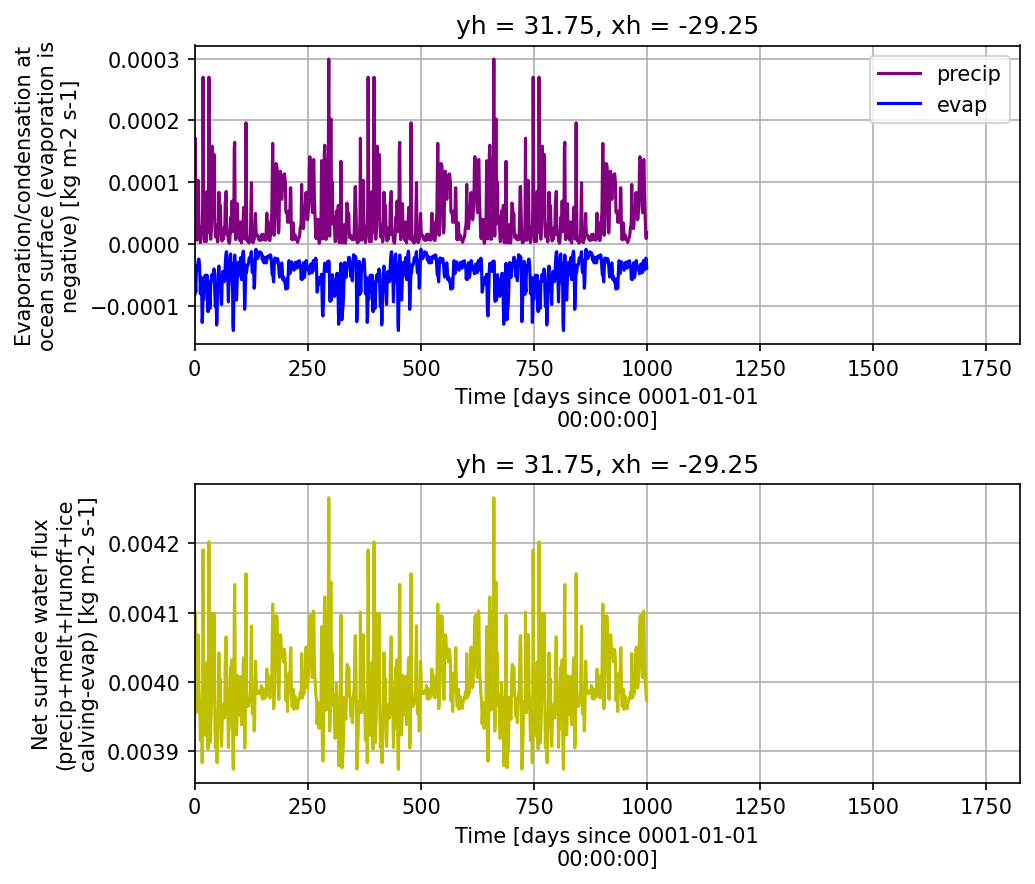

In [49]:
fig = plt.figure(figsize=(7, 6),dpi=150)

plt.subplot(2,1,1)
forcing.precip[:,1,1].plot(label='precip',color='purple')
forcing.evap[:,1,1].plot(label='evap',color='blue')
plt.legend(); plt.grid('on'); plt.xlim([0,1825]); #plt.ylim([-0.3,0.3])

plt.subplot(2,1,2)
forcing.PRCmE[:,1,1].plot(color='y')
plt.grid('on'); 
plt.xlim([0,1825]); #plt.ylim([-500,500])
fig.tight_layout()


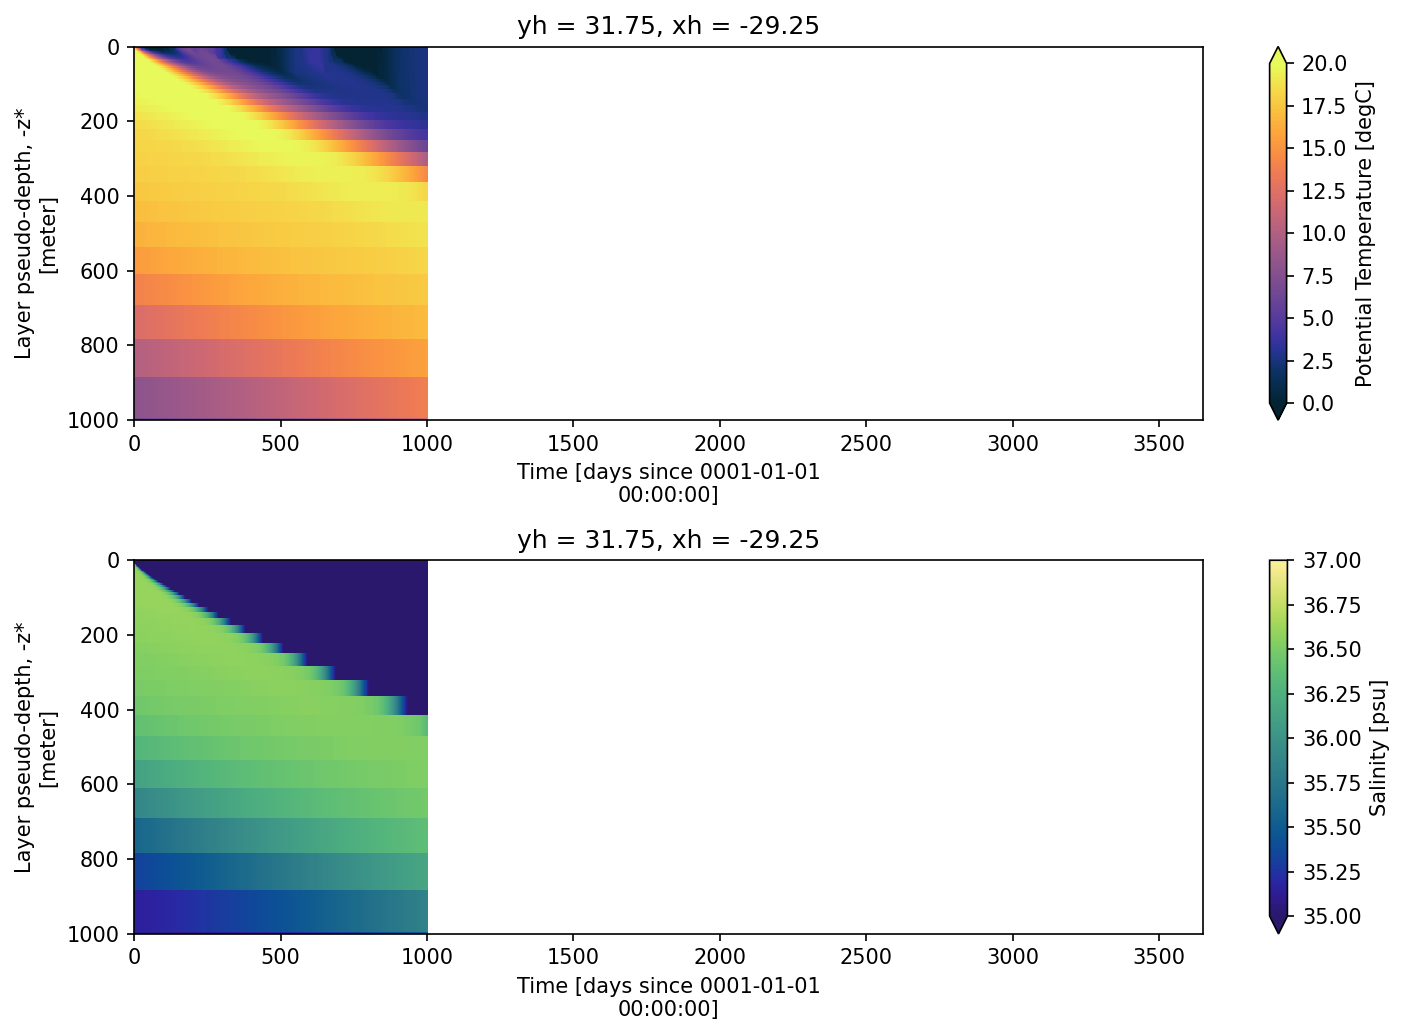

In [50]:
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
ds.temp[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=0,vmax=20)
plt.gca().invert_yaxis()
plt.ylim([1000,0]);
plt.xlim([0,3650]);

plt.subplot(2,1,2)
ds.salt[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.haline,vmin=35, vmax=37)
plt.gca().invert_yaxis()

plt.ylim([1000,0]);
plt.xlim([0,3650]);


fig.tight_layout()

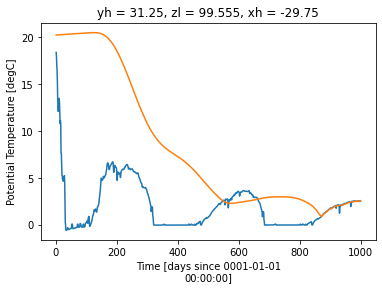

In [51]:
ds.temp[0:1440,0,0,0].plot()
ds.temp[0:1440,30,0,0].plot()

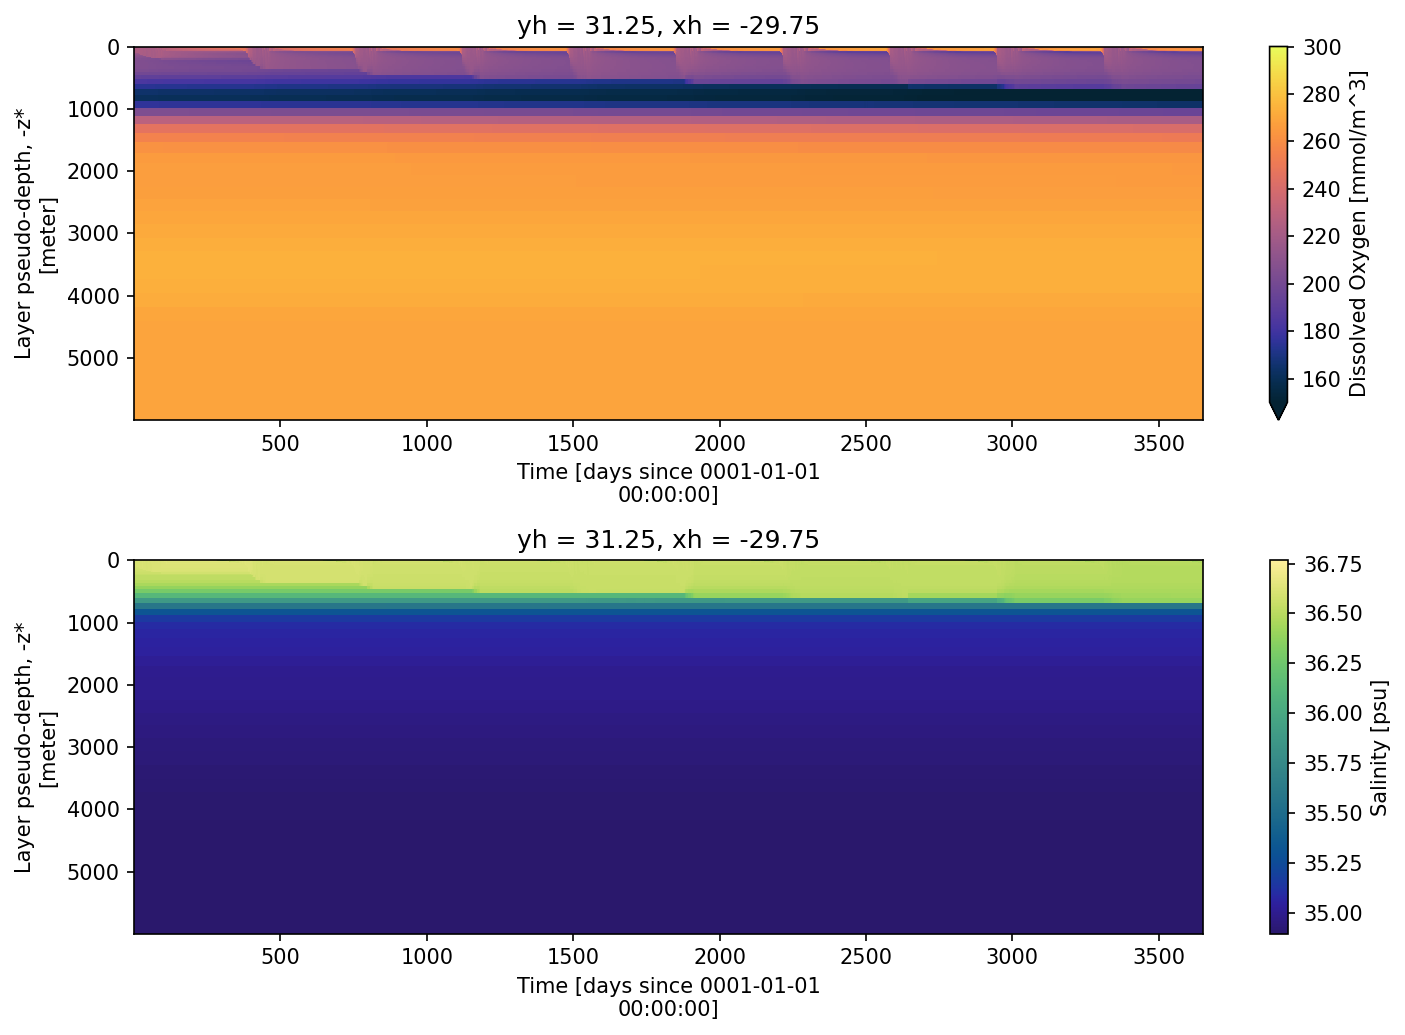

In [19]:
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
prog.O2[:,:,0,0].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=150,vmax=300)
plt.gca().invert_yaxis()

plt.subplot(2,1,2)
ds.salt[:,:,0,0].transpose('zl','Time',).plot(cmap=cmocean.cm.haline)
plt.gca().invert_yaxis()

fig.tight_layout()


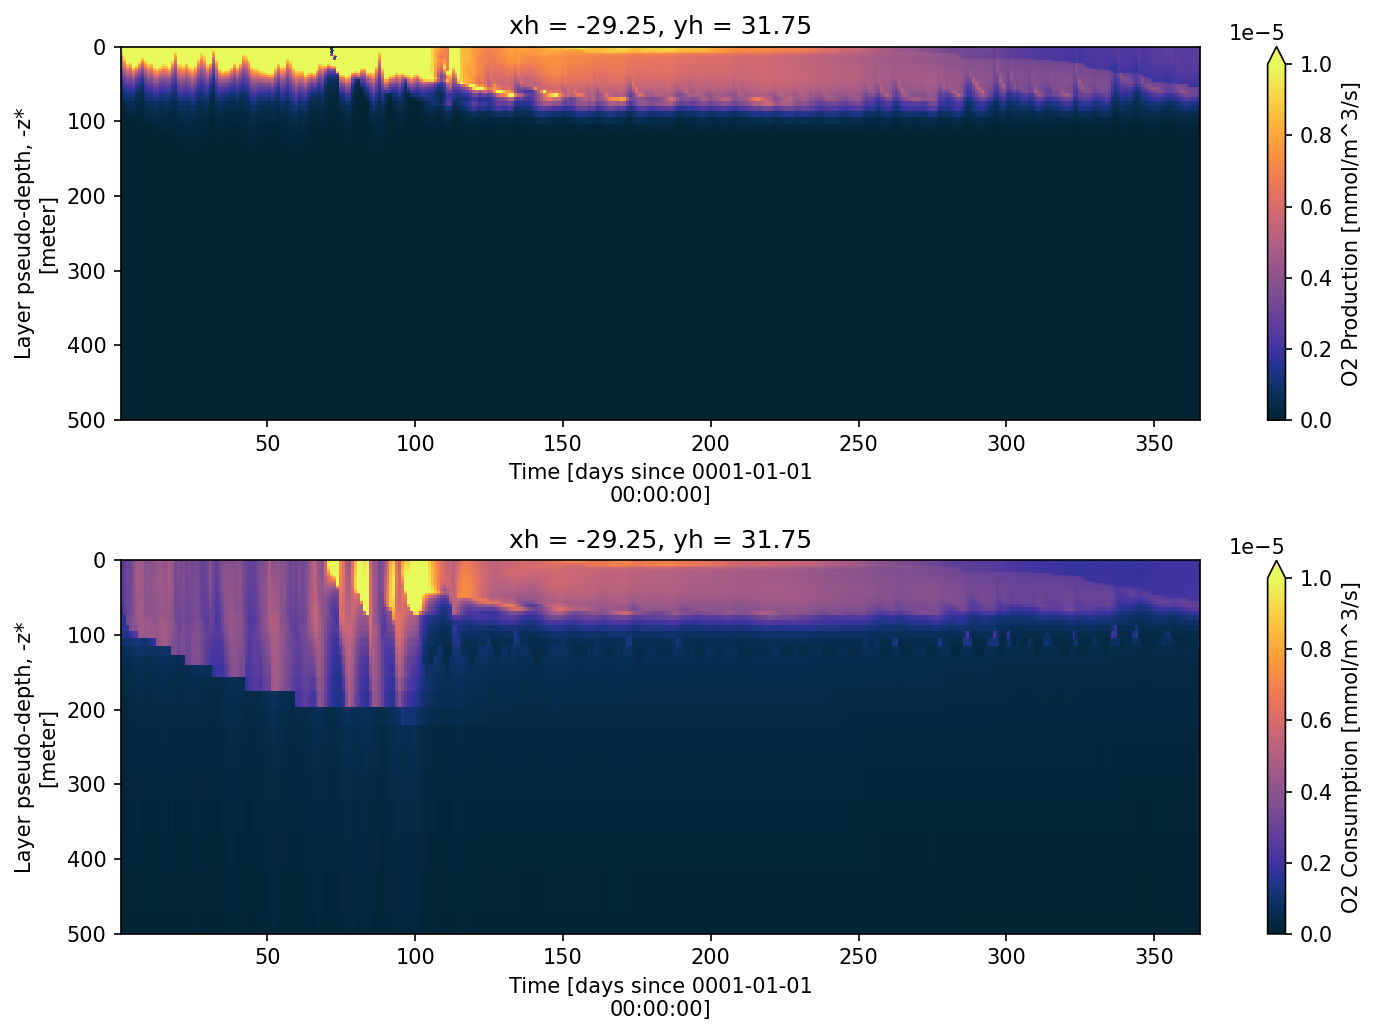

In [20]:
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
timelim=365
MARBL.O2_PRODUCTION[0:timelim,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=0,vmax=1e-5)
plt.gca().invert_yaxis()
plt.ylim([500,0])

plt.subplot(2,1,2)
MARBL.O2_CONSUMPTION[0:timelim,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=0,vmax=1e-5)
plt.gca().invert_yaxis()
plt.ylim([500,0])

fig.tight_layout()


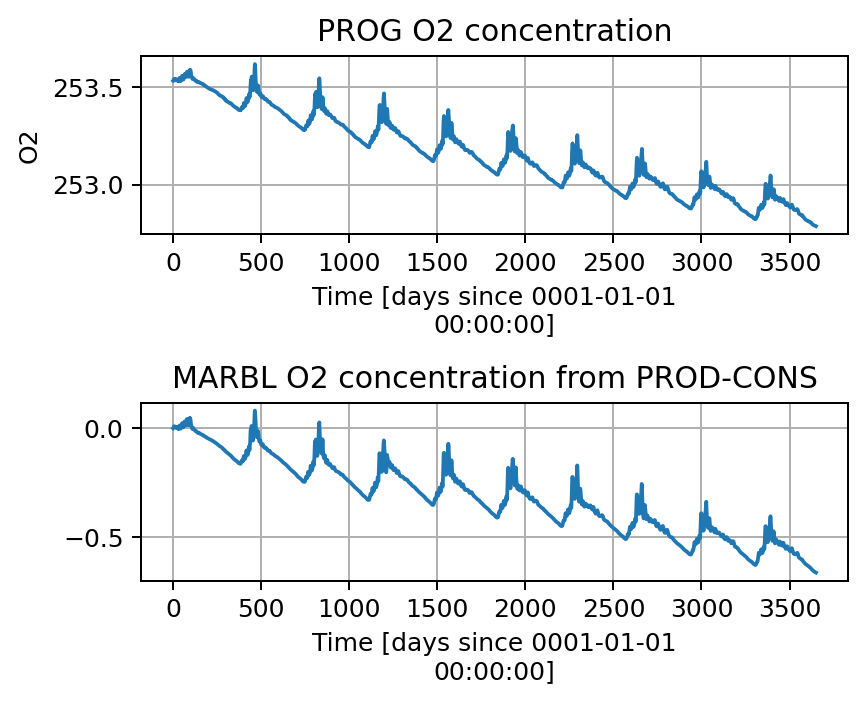

In [21]:
fig = plt.figure(figsize=(5, 4),dpi=180)
plt.subplot(2,1,1)
timelim=365*10
(ds.O2[0:timelim,:,0,0]*dz/6000).sum('zl').plot()

plt.grid()
plt.title('PROG O2 concentration')


plt.subplot(2,1,2)
((MARBL.O2_PRODUCTION[0:timelim,:,0,0]-MARBL.O2_CONSUMPTION[0:timelim,:,0,0])*86400*dz/6000).sum('zl').cumsum('Time').plot()
plt.title('MARBL O2 concentration from PROD-CONS')

plt.grid()
plt.tight_layout()

Text(0.5, 1.0, 'difference between MARBL and prog files')

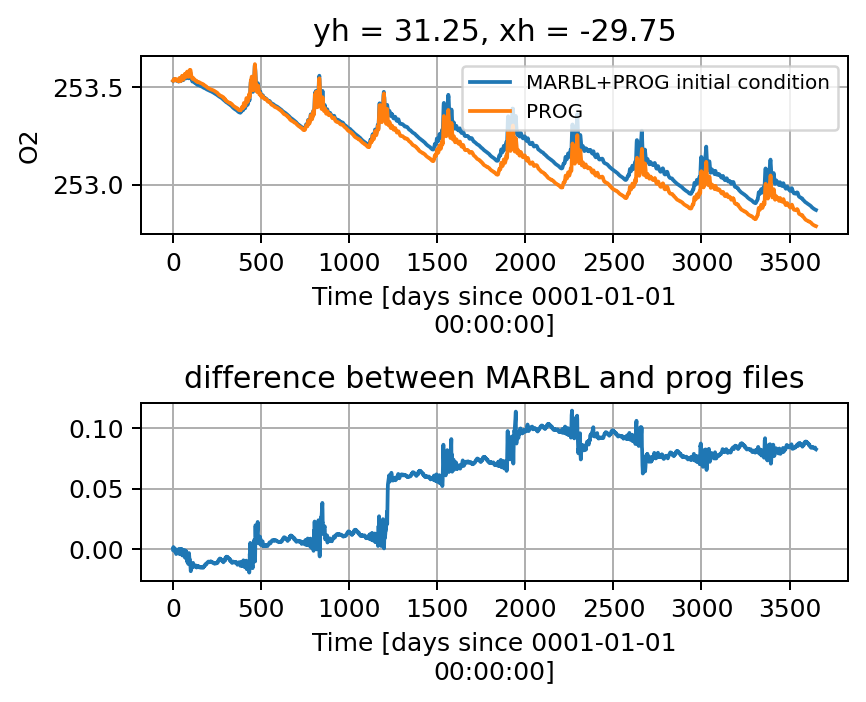

In [22]:
fig = plt.figure(figsize=(5, 4),dpi=180)
plt.subplot(2,1,1)
timelim=365*10
O2_IC = (ds.O2[0,:,0,0]*dz/6000).sum('zl')
MARBL_result = (((MARBL.O2_PRODUCTION[0:timelim,:,0,0]-MARBL.O2_CONSUMPTION[0:timelim,:,0,0])*86400*dz/6000).sum('zl').cumsum('Time')+O2_IC)
MARBL_result.plot(label='MARBL+PROG initial condition')
MOM_result=(ds.O2[0:timelim,:,0,0]*dz/6000).sum('zl')
MOM_result.plot(label='PROG'); 
plt.grid()
plt.legend(fontsize=8)

plt.subplot(2,1,2)
(MARBL_result-MOM_result).plot()
plt.grid()
plt.tight_layout()
plt.title('difference between MARBL and prog files')

## There is a mismatch, maybe it's because of the xh, yh dimensions that I've neglected? (Using (0,0))

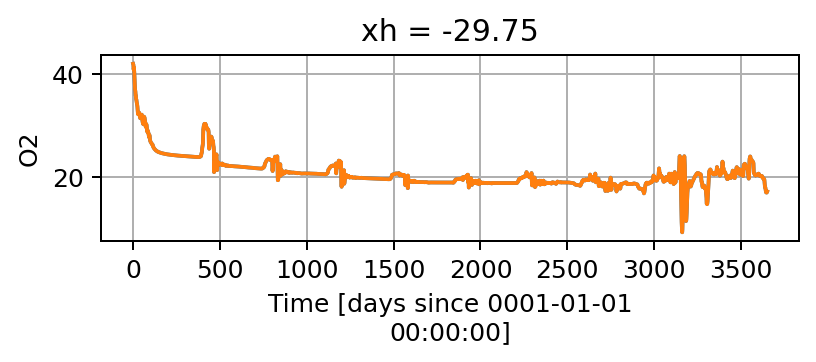

In [23]:
fig = plt.figure(figsize=(5, 3),dpi=180)
plt.subplot(2,1,1)
timelim=365*10
(prog.O2[0:timelim,:,1,0]-prog.O2[0:timelim,:,0,0]).sum('zl').plot()
(ds.O2[0:timelim,:,1,0]-ds.O2[0:timelim,:,0,0]).sum('zl').plot()

#(prog.O2[0:timelim,:,0,0]*dz/6000).sum('zl').plot()
plt.grid()
#plt.gca().invert_yaxis()
#plt.ylim([500,0])

In [24]:
np.nanmax(ds.zl-prog.zl)

0.0

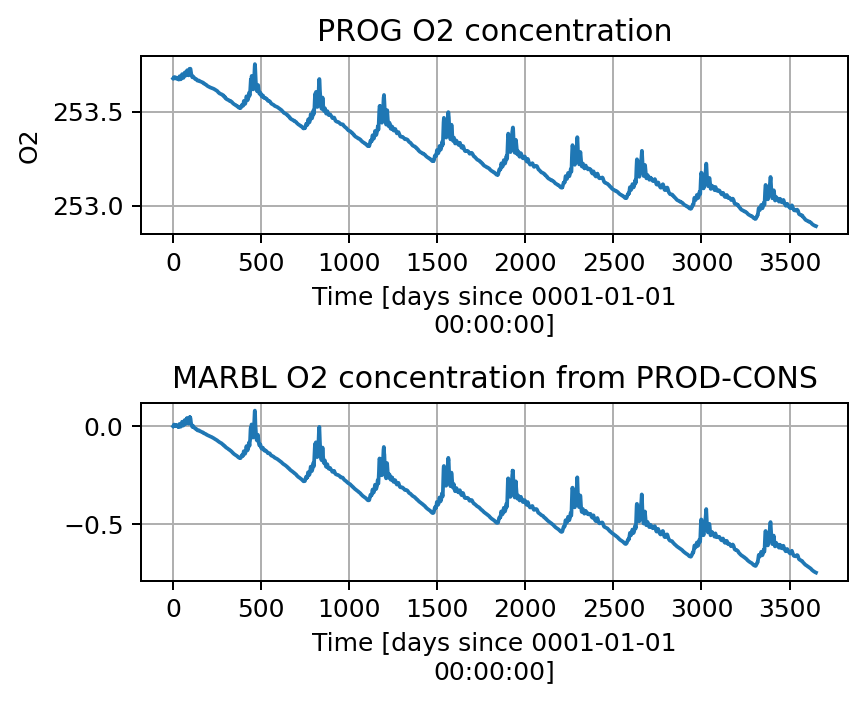

In [25]:
fig = plt.figure(figsize=(5, 4),dpi=180)
plt.subplot(2,1,1)
timelim=365*10
(ds.O2[0:timelim,:,:,:].sum('xh').sum('yh')*dz/6000/4).sum('zl').plot()
plt.grid()
plt.title('PROG O2 concentration')


plt.subplot(2,1,2)
((MARBL.O2_PRODUCTION[0:timelim,:,:,:].sum('xh').sum('yh')/4 - MARBL.O2_CONSUMPTION[0:timelim,:,:,:].sum('xh').sum('yh')/4)*86400*dz/6000).sum('zl').cumsum('Time').plot()
plt.title('MARBL O2 concentration from PROD-CONS')

plt.grid()
plt.tight_layout()

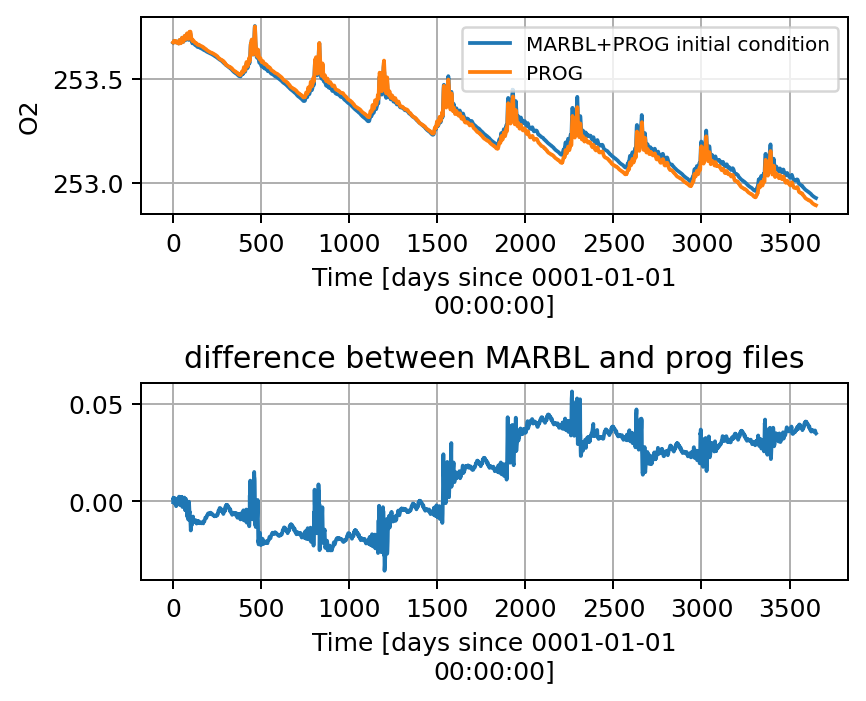

In [26]:
fig = plt.figure(figsize=(5, 4),dpi=180)
plt.subplot(2,1,1)
timelim=365*10
O2_IC = (ds.O2[0,:,:,:].sum('xh').sum('yh')/4*dz/6000).sum('zl')
MARBL_result =((MARBL.O2_PRODUCTION[0:timelim,:,:,:].sum('xh').sum('yh')/4 - MARBL.O2_CONSUMPTION[0:timelim,:,:,:].sum('xh').sum('yh')/4)*86400*dz/6000).sum('zl').cumsum('Time')+O2_IC
MARBL_result.plot(label='MARBL+PROG initial condition')
MOM_result=(ds.O2[0:timelim,:,:,:].sum('xh').sum('yh')*dz/6000/4).sum('zl')
MOM_result.plot(label='PROG'); 
plt.grid()
plt.legend(fontsize=8)

plt.subplot(2,1,2)
(MARBL_result-MOM_result).plot()
plt.grid()
plt.tight_layout()
plt.title('difference between MARBL and prog files')
plt.tight_layout()

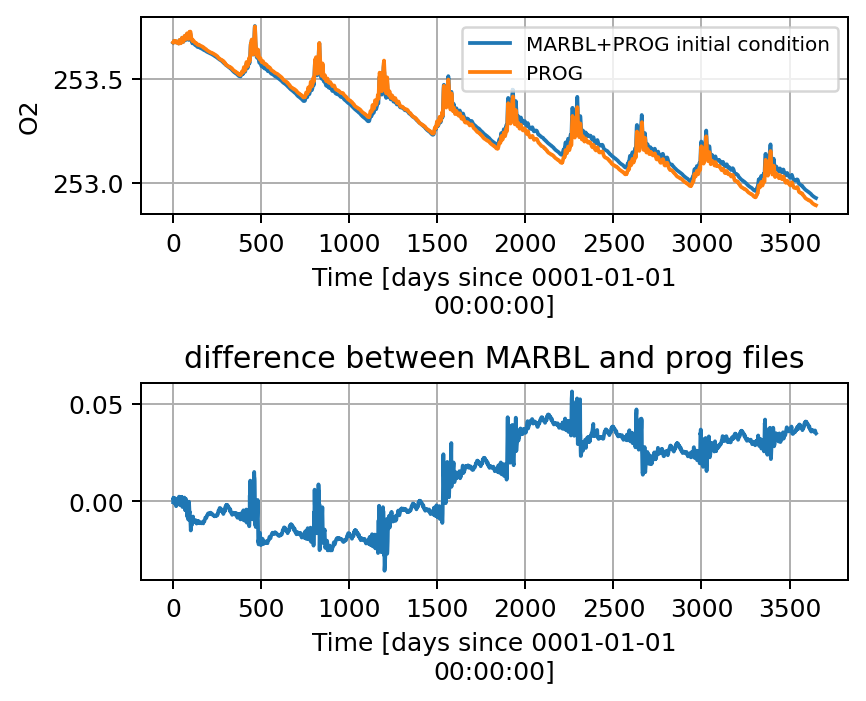

In [27]:
fig = plt.figure(figsize=(5, 4),dpi=180)
plt.subplot(2,1,1)
timelim=365*1000
O2_IC = (ds.O2[0,:,:,:].sum('xh').sum('yh')/4*dz/6000).sum('zl')
MARBL_result =((MARBL.O2_PRODUCTION[0:timelim,:,:,:].sum('xh').sum('yh')/4 - MARBL.O2_CONSUMPTION[0:timelim,:,:,:].sum('xh').sum('yh')/4)*86400*dz/6000).sum('zl').cumsum('Time')+O2_IC
MARBL_result.plot(label='MARBL+PROG initial condition')
MOM_result=(ds.O2[0:timelim,:,:,:].sum('xh').sum('yh')*dz/6000/4).sum('zl')
MOM_result.plot(label='PROG'); 
plt.grid()
plt.legend(fontsize=8)

plt.subplot(2,1,2)
(MARBL_result-MOM_result).plot()
plt.grid()
plt.tight_layout()
plt.title('difference between MARBL and prog files')
plt.tight_layout()

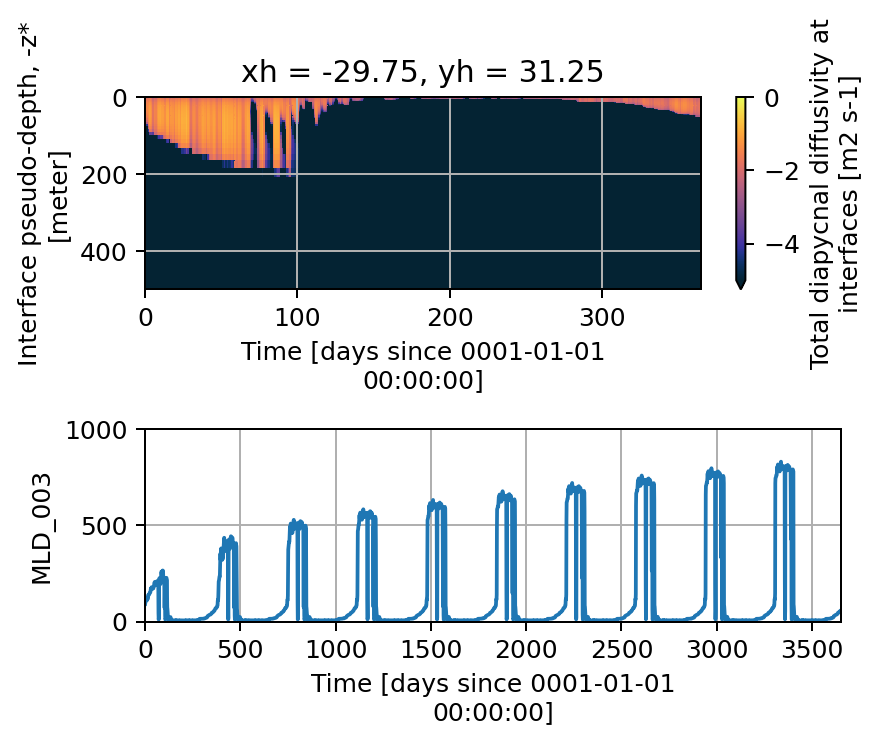

In [34]:
fig = plt.figure(figsize=(5, 4),dpi=180)
plt.subplot(2,1,1)

timelim=365
xr.ufuncs.log10(visc.Kd_interface[0:timelim,:,0,0]).transpose('zi','Time',).plot(cmap=cmocean.cm.thermal,vmin=-5,vmax=0)
plt.gca().invert_yaxis()
plt.ylim([500,0])
plt.grid()

plt.subplot(2,1,2)
(visc.MLD_003.sum('xh').sum('yh')/4).plot()
plt.xlim([0,3650])
plt.ylim([0,1000])

plt.grid()
plt.tight_layout()


In [31]:
visc.MLD_003

<xarray.DataArray 'MLD_003' (Time: 3650, yh: 2, xh: 2)>
array([[[91.845024, 91.845024],
        [91.845024, 91.845024]],

       [[99.94305 , 99.94305 ],
        [99.94305 , 99.94305 ]],

       ...,

       [[56.814594, 56.814594],
        [56.814594, 56.814594]],

       [[57.433853, 57.433853],
        [57.433853, 57.433853]]], dtype=float32)
Coordinates:
  * xh       (xh) float64 -29.75 -29.25
  * yh       (yh) float64 31.25 31.75
  * Time     (Time) float64 0.5 1.5 2.5 3.5 ... 3.648e+03 3.648e+03 3.65e+03
Attributes:
    units:          m
    long_name:      Mixed layer depth (delta rho = 0.03)
    cell_methods:   area:mean yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT

In [ ]:
fig = plt.figure(figsize=(5, 3),dpi=180)
plt.subplot(2,1,1)
timelim=365*10
O2_IC = (prog.O2[0,:,0,0]*dz/6000).sum('zl')
(((MARBL.O2_PRODUCTION[0:timelim,:,0,0]-MARBL.O2_CONSUMPTION[0:timelim,:,0,0])*86400*dz/6000).sum('zl').cumsum('Time')+O2_IC).plot()
(prog.O2[0:timelim,:,0,0]*dz/6000).sum('zl').plot()

In [42]:
# print(MARBL.O2_CONSUMPTION)
# print(MARBL.O2_PRODUCTION)
# print(prog.O2)


In [23]:
(MARBL.O2_PRODUCTION).shape

(36500, 75, 2, 2)

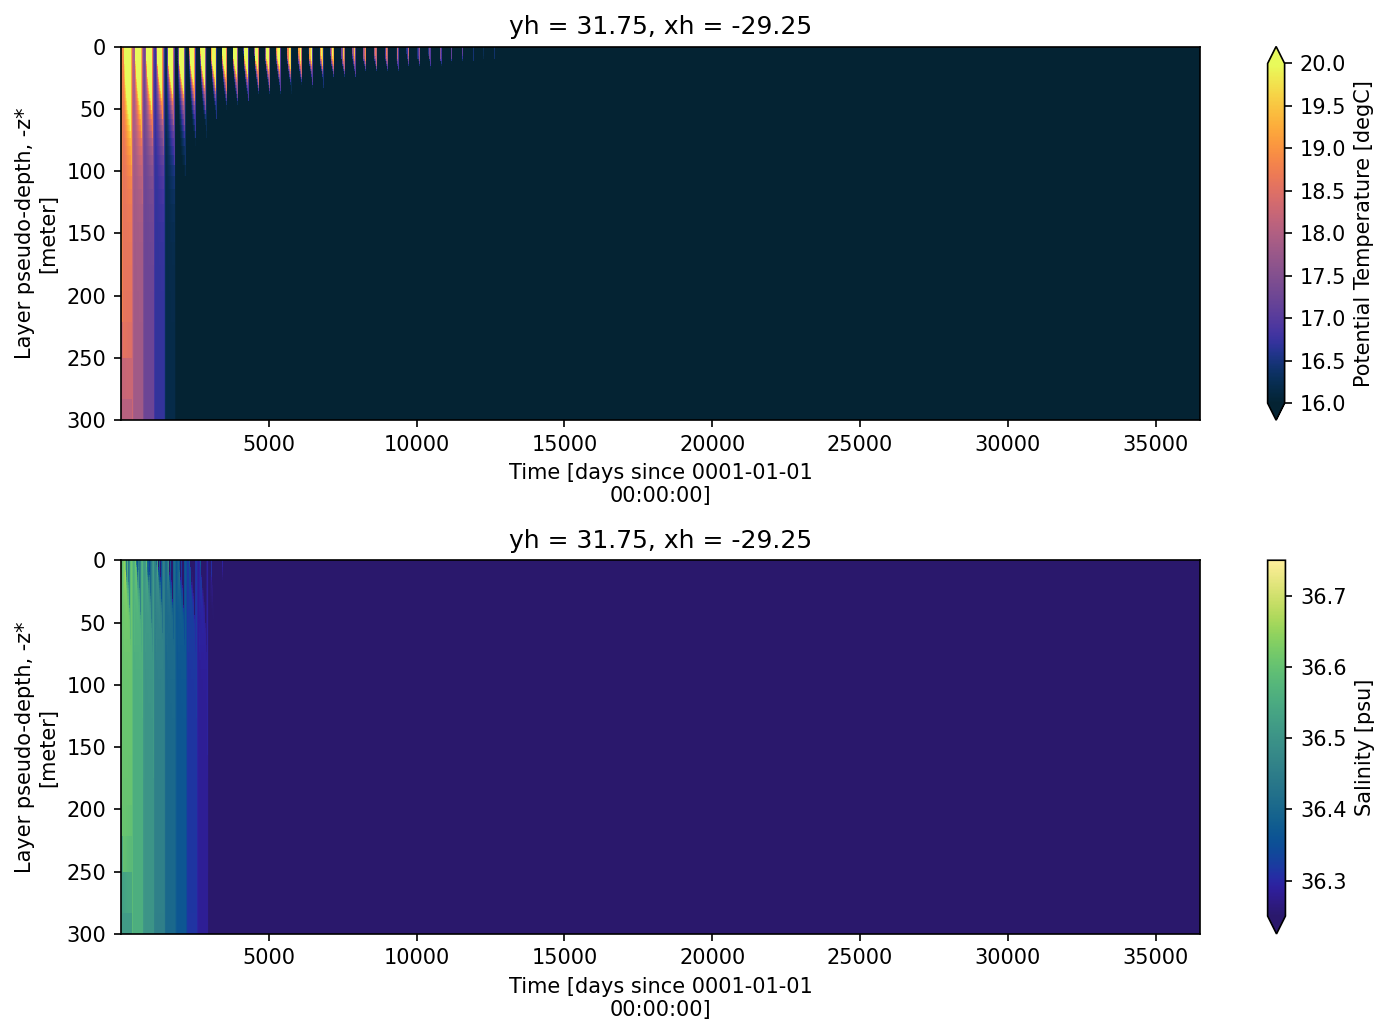

In [10]:
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
ds.temp[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=16,vmax=20)
plt.ylim([0,300])
plt.gca().invert_yaxis()

plt.subplot(2,1,2)
ds.salt[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.haline,vmin=36.25,vmax=36.75)
plt.ylim([0,300])

plt.gca().invert_yaxis()

fig.tight_layout()

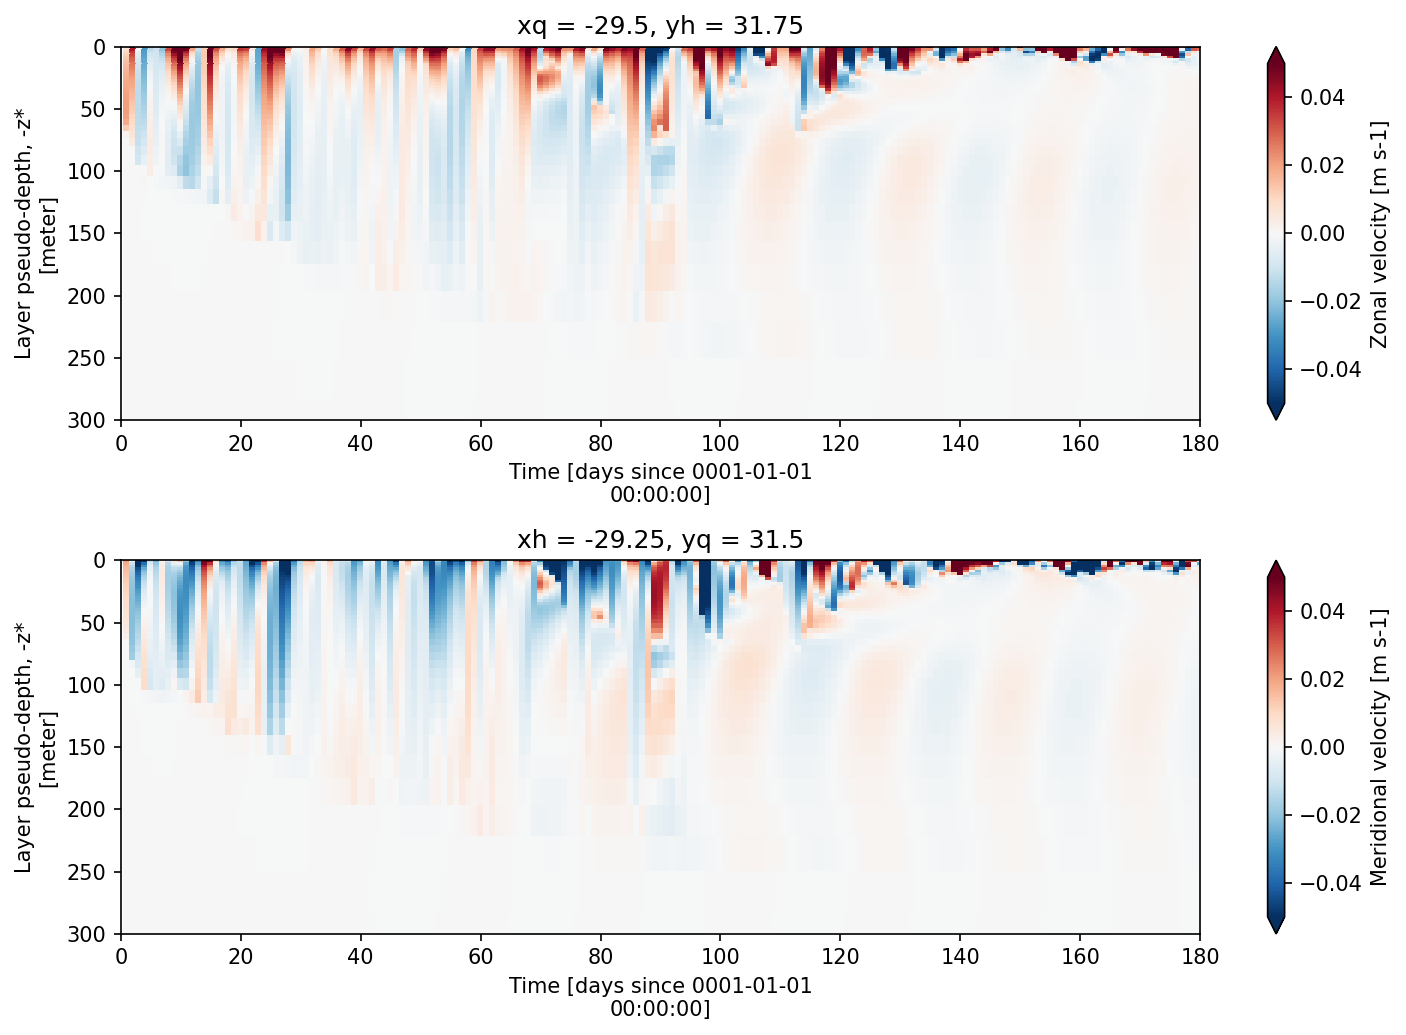

In [11]:
timelim=180
depthlim=300
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
ds.u[:,:,1,1].transpose('zl','Time',).plot(cmap=plt.cm.RdBu_r,vmin=-.05,vmax=0.05)
plt.xlim([0,timelim]); plt.ylim([0,depthlim])

plt.gca().invert_yaxis()

plt.subplot(2,1,2)
ds.v[:,:,1,1].transpose('zl','Time',).plot(cmap=plt.cm.RdBu_r,vmin=-.05,vmax=0.05)
plt.xlim([0,timelim]); plt.ylim([0,depthlim])

plt.gca().invert_yaxis()

fig.tight_layout()

In [68]:

grid= Grid(ds, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});


u = ds.u[:,:,:,:]; u=grid.interp(u,axis='X')
v = ds.v[-1,0,:];  v=grid.interp(v,axis='Y')

vel_mag = u**2+v**2

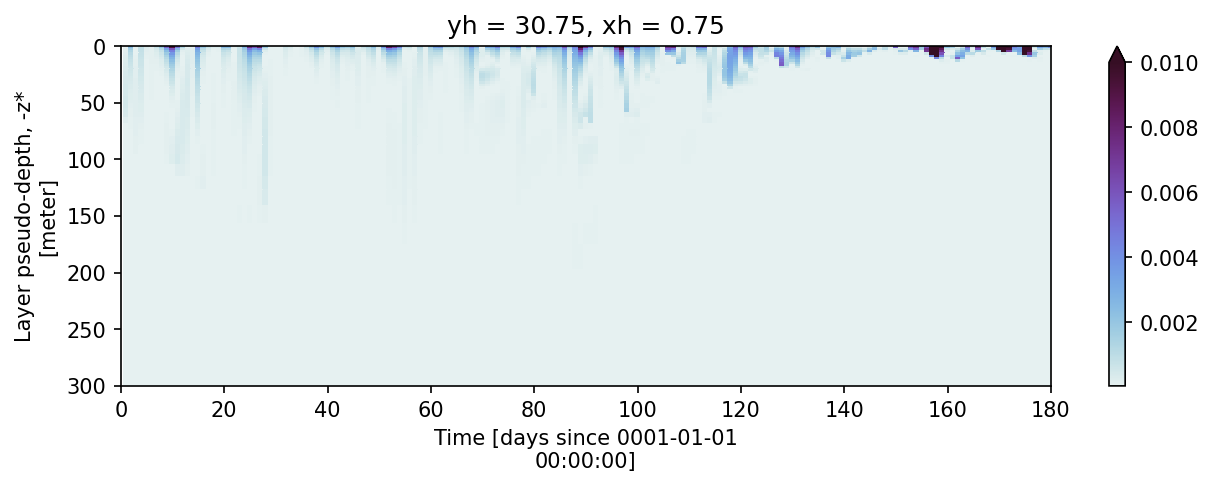

In [72]:
timelim=180
depthlim=300
fig = plt.figure(figsize=(10, 3),dpi=150)
plt.subplot(1,1,1)
vel_mag[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.dense,vmax=0.01)
plt.xlim([0,timelim]); plt.ylim([0,depthlim])

plt.gca().invert_yaxis()

In [66]:
%

0.0